# 16-1. 데이터 변형(Data Augmentation)

### 이미지 전처리 - tensorflow를 이용한 색 공간 변형

#### RGB
- RGB 모델은 빛의 삼원색을 이용하여 색을 표현하는 기본적인 색상 모델

- 색을 빨강(Red), 초록(Green), 파랑(Blue), 3가지 성분의 조합으로 표현한다

- R, G, B값은 0~255 사이의 값들로 표현된다.


- RGB Image = [Width, Height, Channel]  

    - Width : 영상의 가로 길이
    - Height : 영상의 세로 길이
    - Channel : R, G, B 3개의 채널
    
---
#### GRAY
 
Gray 영상은 색(color) 정보를 사용하지 않고 밝기 정보만으로 영상을 표현한다. 검정색(0) 부터 흰색(255)까지 총 256단계의 밝기값(intensity)으로 이미지 픽셀 값을 표현한다.

---

- Gray Image = [Width, Height, Channel]  

     - Width : 영상의 가로 길이
     - Height : 영상의 세로 길이
     - Channel : 1개의 채널

---

- tf.image.rgb_to_grayscale(image)

     - image : 입력 RGB 영상
    
*Gray 영상은 1개의 Channel만 갖고 있으므로 영상의 차원을 줄이기 위해 np.squeeze() 함수로 1개짜리 Channel 차원을 없애줍니다.*

#### HSV
 
- HSV 모델은 인간의 색인지에 기반을 둔 색상 모델

- Hue(색조), Saturation(채도), Value(명도), 3가지 성분의 조합으로 표현

- Hue(색조) : 색의 종류. 0º~360º의 범위를 갖는다.

- Saturation(채도) : 색의 선명도, 진함의 정도(가장 진한 상태를 100%로 한다)

- Value(명도) : 색의 밝기, 밝은 정도(가장 밝은 상태를 100%로 한다)
---  

- tf.image.rgb_to_hsv(image)  

    - image : 입력 RGB 영상
  
---  
 
#### YUV
 
YUV 영상은 빛의 밝기를 나타내는 휘도(Y)와 색상신호 2개(U, V)로 표현하는 방식이다.
 
TV나 비디오 카메라에서 많이 사용되는 방식으로 RGB 영상보다 메모리 효율이 좋다.

---
- Y : 빛의 밝기 (Gray 영상)
- U : 청색 색차
- V : 적색 색차
---  
- tf.image.rgb_to_yuv(image)
    - image : 입력 RGB 영상
---  

*Tensorflow에서 좀 더 정확하게 hsv, yuv 영상을 계산하기 위해 0~255 사이의 정수 픽셀 값을 0~1 사이의 float 값으로 바꿔주어야 한다.*

ref) https://bradbury.tistory.com/64

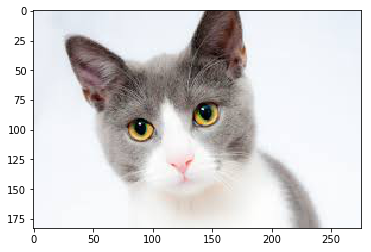

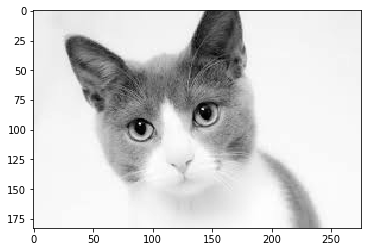

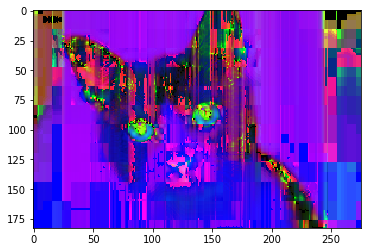

W0729 22:08:08.159859 15492 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


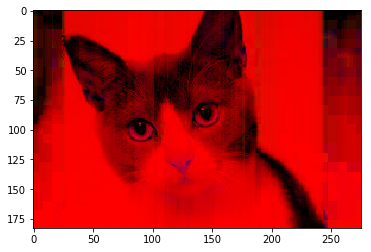

In [39]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

def Visualize(image, color_map = None):
    plt.imshow(image, cmap = color_map)
    plt.show()

#Tensorflow에서 좀 더 정확하게 hsv, yuv 영상을 계산하기 위해 
#0~255 사이의 정수 픽셀 값을 0~1 사이의 float 값으로 바꿔주어야 한다.
def MinMaxScaler(data):
    numerator = data - np.min(data, 0) #numerator : 분자
    denominator = np.max(data, 0) - np.min(data, 0) #denominator : 분모
    # noise term prevents the zero division 
    return numerator / (denominator + 1e-7)

cat_img = np.array(Image.open('./img/cat.jpg'))
Visualize(cat_img)

# Gray 영상으로 변환
gray = tf.image.rgb_to_grayscale(cat_img) # 색 정보를 사용하지 않고, 밝기 정보만으로 표현
gray = np.squeeze(gray)
Visualize(gray, 'gray')

# HSV 영상으로 변환
hsv = np.float32(cat_img)
hsv = MinMaxScaler(hsv)
hsv = tf.image.rgb_to_hsv(hsv)
Visualize(hsv , 'hsv')

# YUV 영상으로 변환
yuv = np.float32(img)
yuv = MinMaxScaler(yuv)
yuv = tf.image.rgb_to_yuv(yuv)
Visualize(yuv)


### 참고 [numpy] squeeze, expand_dims

- numpy.expand_dims(a, axis) : 차원을 늘리는 함수
- numpy.squeeze(a, axis=None) :  차원을 줄이는 함수

squeeze는 차원 중 사이즈가 1인 것을 찾아 스칼라값으로 바꿔 해당 차원을 제거한다.

ref) https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html
https://docs.scipy.org/doc/numpy/reference/generated/numpy.squeeze.html

In [21]:
# 차원 늘리기, 차원 줄이기

x = np.array([[1,2],[3,4]])
print(x)
print(x.shape,'\n')

# numpy.expand_dims(a, axis)
y = np.expand_dims(x, axis=0) # 0차원에 차원을 추가
print(y)
print(y.shape,'\n')

y2 = np.expand_dims(x, axis=1) # 1차원에 차원을 추가
print(y2)
print(y2.shape,'\n')

# numpy.squeeze(a, axis=None)
a = np.array([[[0],[1],[2]]])
print(a)
print(a.shape,'\n') # (1,3,1)

b = np.squeeze(a) # axis 값을 주지 않았을 경우 모든 1차원이 사라짐
print(b.shape,'\n') # (3,) 

c = np.squeeze(a, axis = 0) # axis를 0으로 주었을 경우, 제일 앞의 차원이 사라짐
print(c.shape,'\n') # (3,1)

d = np.squeeze(a, axis = 1)
print(d.shape, '\n')
# ValueError: cannot select an axis to squeeze out which has size not equal to one
# 3이 있는 axis=1을 축소하려고 하면, 에러가 발생

[[1 2]
 [3 4]]
(2, 2) 

[[[1 2]
  [3 4]]]
(1, 2, 2) 

[[[1 2]]

 [[3 4]]]
(2, 1, 2) 

[[[0]
  [1]
  [2]]]
(1, 3, 1) 

(3,) 

(3, 1) 



ValueError: cannot select an axis to squeeze out which has size not equal to one

### 이미지 전처리 - Data augmentation
- 데이터를 늘려 네트워크의 성능을 높이기 위해 사용하는 방법
- 특히 데이터가 적을 때 사용하면 매우 효과적
- 이미지를 여러 방법을 통해 변형한 뒤에 네트워크 입력 이미지로 사용하는 방식
- 일종의 정규화(Regularization) 작업으로 과적합을 막는 효과도 있음
---
#### Resize
 
Resize를 통해 영상의 크기를 조절. 영상의 크기를 줄이면 메모리 효율이 올라가지만 학습의 성능은 떨어질 수 있다.

--- 
- tf.image.resize(Image, Size)  
    - Image : 입력 영상
    - Size : [Width, Height]  
---
#### Rotate
 
Rotate는 영상을 90도씩 회전시켜줌. 원본 영상과 회전된 영상을 같이 CNN에 학습시켜 모델을 일반화 할 수 있다.

---
- tf.image.rot90(Image, k)  
    - Image : 입력 영상
    - k : scalar 정수, 1씩 증가할 때마다 90도씩 회전
  
---
#### Flip
 
Flip은 영상을 반전시켜줌. 마찬가지로 Flip을 통해 데이터를 증가시키고 CNN에 학습시켜 모델을 일반화 할 수 있다.
 
---  
- tf.image.random_flip_left_right(Image,Seed)
    - Image : 입력 영상
    - Seed : 난수를 위한 시드 값
  
 
- tf.image.random_flip_up_down(Image, Seed)
    - Image : 입력 영상
    - Seed : 난수를 위한 시드 값
  
--- 
#### Color Augmentation
 
RGB 영상의 특정 색 공간에 값을 조정할 수 있다. 이를 통해 조명이나 채도, 명도 등에 강인한 모델을 만들 수 있다.
 
---   
- tf.image.random_hue(Image, max_delta)
    - Image : 입력 영상
    - max_delta : Hue를 적용할 비율 [0 ~ 0.5]
  
  
- tf.image.random_saturation(Image, lower, upper)
    - Image : 입력 영상
    - lower : Float 형태의 Lower bound
    - upper : Float 형태의 Upper bound
  
  
- tf.image.random_brightness(Image, max_delta)
    - Image : 입력 영상
    - max_delta : Float 형태의 양수
  
  
- tf.image.random_contrast(Image, lower, upper)
    - Image : 입력 영상
    - lower : Float 형태의 Lower bound
    - upper : Float 형태의 Upper bound
  
--- 
#### Crop
 
Crop은 영상 내에서 랜덤하게 잘라내는 방법. 영상을 Resize해 축소시키는 경우, 영상 내 데이터의 손실이 생긴다. 이를 대신해 Crop으로 영상의 작은 부분을 학습 할 수 있다.

---
- tf.image.random_crop(Image, size)  
    - Image : 입력 영상
    - size : Crop size [width, height, channel]

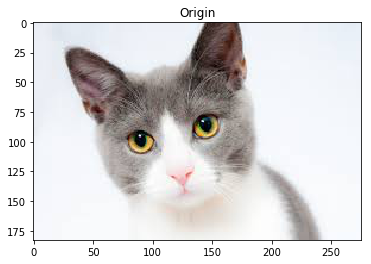

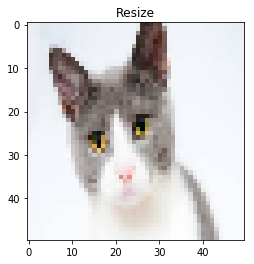

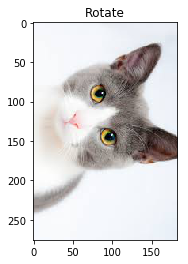

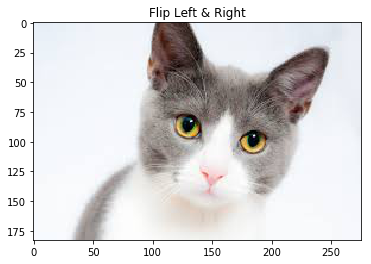

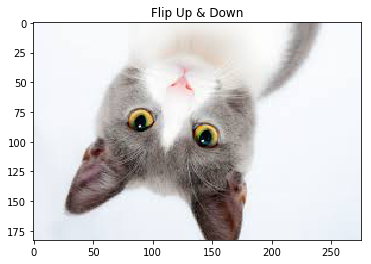

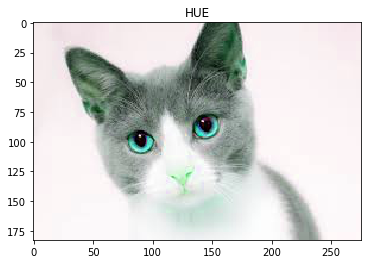

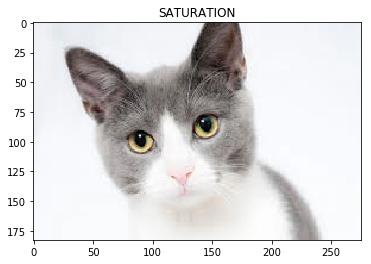

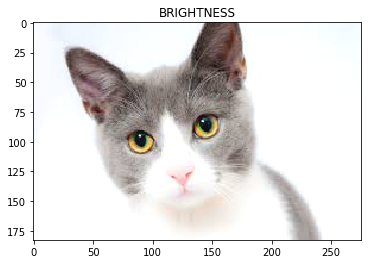

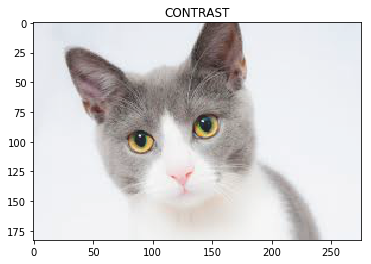

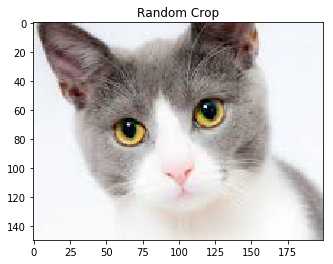

In [43]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

def Visualize(images, name):
    plt.imshow(images)
    plt.title(name)
    plt.show()
    
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

cat_img = np.array(Image.open('./img/cat.jpg'))
Visualize(cat_img, 'Origin')

# Size 변경. 입력 영상의 픽셀 값이 Float [0~1] 형태의 데이터여야 함.
resize = tf.image.resize(cat_img/255, [50,50])
Visualize(resize, 'Resize')

# 회전. 1증가 할 때마다 왼쪽으로 90도씩 회전
rotate = tf.image.rot90(cat_img ,3)
Visualize(rotate, 'Rotate')

#좌우반전, 상하반전
flip_LR = tf.image.random_flip_left_right(cat_img,123)
flip_UD = tf.image.random_flip_up_down(cat_img,123)
Visualize(flip_LR, 'Flip Left & Right')
Visualize(flip_UD, 'Flip Up & Down')

# Color Augmentation
hue = tf.image.random_hue(img, max_delta=0.5)
saturation = tf.image.random_saturation(cat_img, lower=0.5, upper=1.5)
brightness = tf.image.random_brightness(cat_img, max_delta=32. / 255.)
contrast = tf.image.random_contrast(cat_img, lower=0.5, upper=1.5)

Visualize(hue, 'HUE')
Visualize(saturation, 'SATURATION')
Visualize(brightness, 'BRIGHTNESS')
Visualize(contrast, 'CONTRAST')

# 랜덤으로 Crop. 임의의 Crop size를 지정
random_crop = tf.image.random_crop(cat_img,[150,200,3])
Visualize(random_crop, 'Random Crop')